<a href="https://colab.research.google.com/github/emibb01/emibb01/blob/main/Copia_de_ProyectoTSFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identificación de textos de acuerdo a su área científica, física, biología o química.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

# Carga del conjunto de datos

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/redes_neuronales/train.csv')
test=pd.read_csv('/content/drive/MyDrive/redes_neuronales/test.csv')

In [ ]:
from sklearn.utils import shuffle
train = shuffle(train)
train.reset_index(inplace=True, drop=True)
test = shuffle(test)
test.reset_index(inplace=True, drop=True)

In [ ]:
train_comments = train[['Comment']]
train_topic = train[['Topic']]

test_comments = test[['Comment']]
test_topic = test[['Topic']]

# Visualizacion del conjunto de entrenamiento y prueba

In [ ]:
print(train_comments.shape)
print(train_topic.shape)

print(test_comments.shape)
print(test_topic.shape)

(8695, 1)
(8695, 1)
(1586, 1)
(1586, 1)


In [ ]:
print(train_comments['Comment'][1])
print(train_topic['Topic'][1])

Looks like a naughty spider to me
Biology


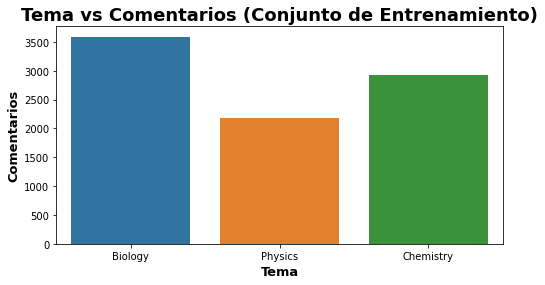

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x = train_topic['Topic'])
plt.title("Tema vs Comentarios (Conjunto de Entrenamiento)",fontsize = 18,fontweight = 'bold')
plt.xlabel("Tema",fontsize = 13,fontweight = 'bold')
plt.ylabel("Comentarios",fontsize=13,fontweight = 'bold')
plt.show()

Para el conjunto de entrenamiento, tenemos:
*   41.3% de comentarios para Biologia
*   25.1% de comentarios para Fisica
*   33.6% de comentarios para Quimica

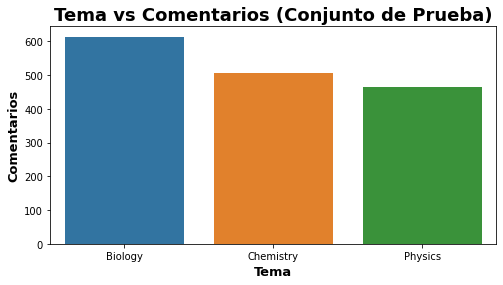

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x = test_topic['Topic'])
plt.title("Tema vs Comentarios (Conjunto de Prueba)",fontsize = 18,fontweight = 'bold')
plt.xlabel("Tema",fontsize = 13,fontweight = 'bold')
plt.ylabel("Comentarios",fontsize=13,fontweight = 'bold')
plt.show()

Para el conjunto de prueba, tenemos:
*   38.7% de comentarios para Biologia
*   29.4% de comentarios para Fisica
*   31.9% de comentarios para Quimica

# Preprocesamiento de datos

Eliminamos los emojis de los comentarios

In [ ]:
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
train_comments['Sin_Emoji'] = train_comments['Comment'].apply(lambda x: deEmojify(x))

<ipython-input-192-db18794aaa99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_comments['Sin_Emoji'] = train_comments['Comment'].apply(lambda x: deEmojify(x))


In [ ]:
train_comments

,Comment,Sin_Emoji
0,Put it in the freezer.,Put it in the freezer.
1,Looks like a naughty spider to me,Looks like a naughty spider to me
2,"Theorists are idiots, experimentalists are idi...","Theorists are idiots, experimentalists are idi..."
3,Beautiful mysterious creatures.. unfortunately...,Beautiful mysterious creatures.. unfortunately...
4,"Typically, no. Depending on how peer review go...","Typically, no. Depending on how peer review go..."
...,...,...
8690,"Also keep in mind those are just the three ""va...","Also keep in mind those are just the three ""va..."
8691,Loves phosphates and it turns pink based on th...,Loves phosphates and it turns pink based on th...
8692,Isn't an atom really small? And I have a hypot...,Isn't an atom really small? And I have a hypot...
8693,Random question- is there a difference between...,Random question- is there a difference between...


In [ ]:
print("Con emoji:",train_comments['Comment'][12])
print("Sin emoji:",train_comments['Sin_Emoji'][12])

Con emoji: Do you mean like maple syrup?
Sin emoji: Do you mean like maple syrup?


Quitar atributos HTML

In [ ]:
def remove_html(text):
    html_pattern = re.compile(r'https?://\S+|www\.\S+')
    return html_pattern.sub(r'', text)

In [ ]:
train_comments['Sin_atributos_HTML'] = train_comments['Sin_Emoji'].apply(lambda x: remove_html(x))

In [ ]:
train_comments

,Comment,Sin_Emoji,Sin_atributos_HTML
0,Put it in the freezer.,Put it in the freezer.,Put it in the freezer.
1,Looks like a naughty spider to me,Looks like a naughty spider to me,Looks like a naughty spider to me
2,"Theorists are idiots, experimentalists are idi...","Theorists are idiots, experimentalists are idi...","Theorists are idiots, experimentalists are idi..."
3,Beautiful mysterious creatures.. unfortunately...,Beautiful mysterious creatures.. unfortunately...,Beautiful mysterious creatures.. unfortunately...
4,"Typically, no. Depending on how peer review go...","Typically, no. Depending on how peer review go...","Typically, no. Depending on how peer review go..."
...,...,...,...
8690,"Also keep in mind those are just the three ""va...","Also keep in mind those are just the three ""va...","Also keep in mind those are just the three ""va..."
8691,Loves phosphates and it turns pink based on th...,Loves phosphates and it turns pink based on th...,Loves phosphates and it turns pink based on th...
8692,Isn't an atom really small? And I have a hypot...,Isn't an atom really small? And I have a hypot...,Isn't an atom really small? And I have a hypot...
8693,Random question- is there a difference between...,Random question- is there a difference between...,Random question- is there a difference between...


In [ ]:
print("Comentarios: \n1 ", train_comments['Comment'][8], "\n2", train_comments['Comment'][55], "\n3",train_comments['Comment'][117])
print("\nSin atributos HTML: \n1 ", train_comments['Sin_atributos_HTML'][8], "\n2", train_comments['Sin_atributos_HTML'][55], "\n3",train_comments['Sin_atributos_HTML'][117])

Comentarios: 
1  The kinds nightmares are made of… 
2 And then there’s ignorance without compassion. Thanks for reminding me. 
3 Thank you…

Sin atributos HTML: 
1  The kinds nightmares are made of… 
2 And then there’s ignorance without compassion. Thanks for reminding me. 
3 Thank you…


Eliminación de signos de puntuación

In [ ]:
import string

In [ ]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [ ]:
train_comments["Sin_signos_de_puntuacion"] = train_comments["Sin_atributos_HTML"].apply(lambda text: remove_punctuation(text))

In [ ]:
train_comments

,Comment,Sin_Emoji,Sin_atributos_HTML,Sin_signos_de_puntuacion
0,Put it in the freezer.,Put it in the freezer.,Put it in the freezer.,Put it in the freezer
1,Looks like a naughty spider to me,Looks like a naughty spider to me,Looks like a naughty spider to me,Looks like a naughty spider to me
2,"Theorists are idiots, experimentalists are idi...","Theorists are idiots, experimentalists are idi...","Theorists are idiots, experimentalists are idi...",Theorists are idiots experimentalists are idio...
3,Beautiful mysterious creatures.. unfortunately...,Beautiful mysterious creatures.. unfortunately...,Beautiful mysterious creatures.. unfortunately...,Beautiful mysterious creatures unfortunately i...
4,"Typically, no. Depending on how peer review go...","Typically, no. Depending on how peer review go...","Typically, no. Depending on how peer review go...",Typically no Depending on how peer review goes...
...,...,...,...,...
8690,"Also keep in mind those are just the three ""va...","Also keep in mind those are just the three ""va...","Also keep in mind those are just the three ""va...",Also keep in mind those are just the three val...
8691,Loves phosphates and it turns pink based on th...,Loves phosphates and it turns pink based on th...,Loves phosphates and it turns pink based on th...,Loves phosphates and it turns pink based on th...
8692,Isn't an atom really small? And I have a hypot...,Isn't an atom really small? And I have a hypot...,Isn't an atom really small? And I have a hypot...,Isnt an atom really small And I have a hypothe...
8693,Random question- is there a difference between...,Random question- is there a difference between...,Random question- is there a difference between...,Random question is there a difference between ...


In [ ]:
print("Comentarios: \n ", train_comments['Comment'][1])
print("\nSin signos de puntuacion HTML: \n ", train_comments['Sin_signos_de_puntuacion'][1])

Comentarios: 
  Looks like a naughty spider to me

Sin signos de puntuacion HTML: 
  Looks like a naughty spider to me


Comentarios solo con minuscula

In [ ]:
train_comments["Con_minusculas"] = train_comments["Sin_signos_de_puntuacion"].str.lower()

In [ ]:
train_comments

,Comment,Sin_Emoji,Sin_atributos_HTML,Sin_signos_de_puntuacion,Con_minusculas
0,Put it in the freezer.,Put it in the freezer.,Put it in the freezer.,Put it in the freezer,put it in the freezer
1,Looks like a naughty spider to me,Looks like a naughty spider to me,Looks like a naughty spider to me,Looks like a naughty spider to me,looks like a naughty spider to me
2,"Theorists are idiots, experimentalists are idi...","Theorists are idiots, experimentalists are idi...","Theorists are idiots, experimentalists are idi...",Theorists are idiots experimentalists are idio...,theorists are idiots experimentalists are idio...
3,Beautiful mysterious creatures.. unfortunately...,Beautiful mysterious creatures.. unfortunately...,Beautiful mysterious creatures.. unfortunately...,Beautiful mysterious creatures unfortunately i...,beautiful mysterious creatures unfortunately i...
4,"Typically, no. Depending on how peer review go...","Typically, no. Depending on how peer review go...","Typically, no. Depending on how peer review go...",Typically no Depending on how peer review goes...,typically no depending on how peer review goes...
...,...,...,...,...,...
8690,"Also keep in mind those are just the three ""va...","Also keep in mind those are just the three ""va...","Also keep in mind those are just the three ""va...",Also keep in mind those are just the three val...,also keep in mind those are just the three val...
8691,Loves phosphates and it turns pink based on th...,Loves phosphates and it turns pink based on th...,Loves phosphates and it turns pink based on th...,Loves phosphates and it turns pink based on th...,loves phosphates and it turns pink based on th...
8692,Isn't an atom really small? And I have a hypot...,Isn't an atom really small? And I have a hypot...,Isn't an atom really small? And I have a hypot...,Isnt an atom really small And I have a hypothe...,isnt an atom really small and i have a hypothe...
8693,Random question- is there a difference between...,Random question- is there a difference between...,Random question- is there a difference between...,Random question is there a difference between ...,random question is there a difference between ...


Test comments

Se hace lo mismo para los comentarios de prueba

In [ ]:
test_comments['Sin_Emoji'] = test_comments['Comment'].apply(lambda x: deEmojify(x))
test_comments['Sin_atributos_HTML'] = test_comments['Sin_Emoji'].apply(lambda x: remove_html(x))
test_comments["Sin_signos_de_puntuacion"] = test_comments["Sin_atributos_HTML"].apply(lambda text: remove_punctuation(text))
test_comments["Con_minusculas"] = test_comments["Sin_signos_de_puntuacion"].str.lower()

<ipython-input-206-50fff5a8c556>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_comments['Sin_Emoji'] = test_comments['Comment'].apply(lambda x: deEmojify(x))


In [ ]:
test_comments

,Comment,Sin_Emoji,Sin_atributos_HTML,Sin_signos_de_puntuacion,Con_minusculas
0,"When you clean this gunk off, -> Absolutely, d...","When you clean this gunk off, -> Absolutely, d...","When you clean this gunk off, -> Absolutely, d...",When you clean this gunk off Absolutely do no...,when you clean this gunk off absolutely do no...
1,You are correct that that’s a wood frog (Rana ...,You are correct that that’s a wood frog (Rana ...,You are correct that that’s a wood frog (Rana ...,You are correct that that’s a wood frog Rana s...,you are correct that that’s a wood frog rana s...
2,I do. And I think what you say isn't actually ...,I do. And I think what you say isn't actually ...,I do. And I think what you say isn't actually ...,I do And I think what you say isnt actually tr...,i do and i think what you say isnt actually tr...
3,"I know this answer, but again no source, if yo...","I know this answer, but again no source, if yo...","I know this answer, but again no source, if yo...",I know this answer but again no source if you ...,i know this answer but again no source if you ...
4,This is really interesting because I didn't re...,This is really interesting because I didn't re...,This is really interesting because I didn't re...,This is really interesting because I didnt rea...,this is really interesting because i didnt rea...
...,...,...,...,...,...
1581,Possibly. Denaturation is not the same thing a...,Possibly. Denaturation is not the same thing a...,Possibly. Denaturation is not the same thing a...,Possibly Denaturation is not the same thing as...,possibly denaturation is not the same thing as...
1582,typically bike handlebar rotation axis is not ...,typically bike handlebar rotation axis is not ...,typically bike handlebar rotation axis is not ...,typically bike handlebar rotation axis is not ...,typically bike handlebar rotation axis is not ...
1583,"In this hypothetical case, the pain she percei...","In this hypothetical case, the pain she percei...","In this hypothetical case, the pain she percei...",In this hypothetical case the pain she perceiv...,in this hypothetical case the pain she perceiv...
1584,"Just to be clear, the sun is made of gas/plasm...","Just to be clear, the sun is made of gas/plasm...","Just to be clear, the sun is made of gas/plasm...",Just to be clear the sun is made of gasplasma ...,just to be clear the sun is made of gasplasma ...


# Label Encoder

In [ ]:
import tensorflow
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
le = preprocessing.LabelEncoder()

In [ ]:
test_topic['Topic']

0         Biology
1         Biology
2         Biology
3         Biology
4       Chemistry
          ...    
1581    Chemistry
1582      Physics
1583      Biology
1584      Physics
1585      Biology
Name: Topic, Length: 1586, dtype: object

In [ ]:
train_labels = le.fit_transform(train_topic['Topic'])
test_labels = le.fit_transform(test_topic['Topic'])

In [ ]:
print(train_labels)
print(test_labels)

[0 0 2 ... 0 0 1]
[0 0 0 ... 0 2 0]


In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
print(y_train)
#print(y_test)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.feature_extraction.text import  CountVectorizer

contador = CountVectorizer(stop_words=stopwords)
vectorizador = TfidfVectorizer(stop_words=stopwords)
 
cantidades = contador.fit_transform(train_comments['Con_minusculas'])
valores = vectorizador.fit_transform(train_comments['Con_minusculas'])

In [ ]:
vocabulary1 = vectorizador.get_feature_names_out()

In [ ]:
contador = CountVectorizer(stop_words=stopwords, vocabulary = vocabulary1)
vectorizador = TfidfVectorizer(stop_words=stopwords, vocabulary = vocabulary1)

cantidades1 = contador.fit_transform(test_comments['Con_minusculas'])
valores1 = vectorizador.fit_transform(test_comments['Con_minusculas'])

In [ ]:
#print ("--- Palabras ---")
print(len(vectorizador.get_feature_names_out()))
#print(vectorizador.get_feature_names_out())
#print ("... Vector de cantidades ...")
#print (cantidades[8694])
print ("¨¨¨ Vector de valores ¨¨")
print (valores[1])
print (valores.toarray()[1][7905])

19720
¨¨¨ Vector de valores ¨¨
  (0, 16511)	0.5477185497622011
  (0, 11439)	0.6945884476016101
  (0, 9979)	0.25475682390069326
  (0, 10159)	0.3907047982566987
0.0


In [ ]:
train_comments['Con_minusculas'][1]

'looks like a naughty spider to me'

In [ ]:
vectorizador.get_feature_names_out()[7905]

'hand'

In [ ]:
print(contador.vocabulary_['radiation'])

14323


In [ ]:
print(contador.get_feature_names_out()[14323])

radiation


In [ ]:
x_train = valores.toarray()
x_test = valores1.toarray()

In [ ]:
x_test.shape

(1586, 19720)

In [ ]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#print ("--- Palabras ---")
#print(len(vectorizador.get_feature_names_out()))
#print(vectorizador.get_feature_names_out())
#print ("... Vector de cantidades ...")
#print (cantidades1[0])
print ("¨¨¨ Vector de valores ¨¨")
print (valores1[0])
print (valores1.toarray()[0][4863])

¨¨¨ Vector de valores ¨¨
  (0, 19478)	0.11361689152706068
  (0, 18920)	0.12529653160288678
  (0, 18693)	0.08645028944547048
  (0, 18680)	0.1516325198537181
  (0, 18314)	0.07810890079488926
  (0, 17948)	0.12529653160288678
  (0, 17317)	0.15582864382457698
  (0, 16807)	0.1335272956641458
  (0, 16329)	0.09954630742788859
  (0, 16040)	0.10154459777962681
  (0, 15324)	0.11945671156497373
  (0, 15250)	0.1335272956641458
  (0, 15105)	0.2670545913282916
  (0, 14820)	0.14175805972540487
  (0, 14782)	0.12529653160288678
  (0, 14458)	0.08645028944547048
  (0, 13853)	0.08747401368045474
  (0, 13723)	0.13039810439671282
  (0, 13558)	0.15582864382457698
  (0, 13394)	0.21077225493160326
  (0, 13250)	0.1335272956641458
  (0, 13199)	0.14175805972540487
  (0, 10442)	0.13039810439671282
  (0, 10240)	0.11492699523197485
  (0, 10238)	0.12529653160288678
  :	:
  (0, 9644)	0.137228343392406
  (0, 9537)	0.1090871751940618
  (0, 9498)	0.09131554336662953
  (0, 7794)	0.13039810439671282
  (0, 7760)	0.1558286438

In [ ]:
test_comments['Con_minusculas'][0]

'when you clean this gunk off  absolutely do not use vinegar and bleach togetherever  a single deep breath can destroy your lungs and can kill you and that can destroy the gaskets and chrome i prefer trisodium phosphate and rinse and sometimes causticsoda with another rinse for tackling porcelain problem i’m guessing but the rubber flapper should be removed and replaced be careful always use safety glasses a mask gloves and keep your fingers away from your face it’s not worth losing a lung or an eye or two over cleaning toilet please read the labels and please be careful when using chemicals picked up at local grocery store'

In [ ]:
vectorizador.get_feature_names_out()[4863]

'derivations'

# Creacion del modelo

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer = regularizers.l2(l2 = 0.001) ),
    layers.Dropout(0.5),
    layers.Dense(8, activation="relu"), #kernel_regularizer = regularizers.l1_l2(l1 = 0.0001, l2 = 0.0002)
    layers.Dropout(0.35),
    layers.Dense(3, activation="softmax")
])

In [ ]:
model.compile(optimizer="rmsprop", #Por defecto learning_rate=0.001
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "Best",
        save_best_only = True,
        monitor = "val_loss"
    )
]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=120,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks = callbacks)

Epoch 1/120
16/16 [==============================] - 3s 132ms/step - loss: 1.0953 - accuracy: 0.4095 - val_loss: 1.0795 - val_accuracy: 0.3970
Epoch 2/120
16/16 [==============================] - 2s 118ms/step - loss: 1.0680 - accuracy: 0.4157 - val_loss: 1.0654 - val_accuracy: 0.3970
Epoch 3/120
16/16 [==============================] - 2s 123ms/step - loss: 1.0531 - accuracy: 0.4174 - val_loss: 1.0533 - val_accuracy: 0.3970
Epoch 4/120
16/16 [==============================] - 2s 122ms/step - loss: 1.0371 - accuracy: 0.4261 - val_loss: 1.0429 - val_accuracy: 0.3970
Epoch 5/120
16/16 [==============================] - 2s 124ms/step - loss: 1.0255 - accuracy: 0.4346 - val_loss: 1.0333 - val_accuracy: 0.4000
Epoch 6/120
16/16 [==============================] - 2s 124ms/step - loss: 1.0130 - accuracy: 0.4490 - val_loss: 1.0246 - val_accuracy: 0.4170
Epoch 7/120
16/16 [==============================] - 2s 119ms/step - loss: 1.0006 - accuracy: 0.4564 - val_loss: 1.0149 - val_accuracy: 0.4350

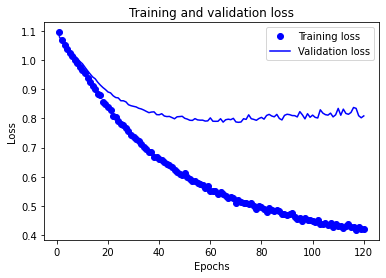

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

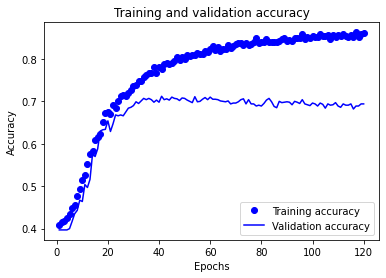

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("Best")
test_loss, test_acc = test_model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 5ms/step - loss: 0.6029 - accuracy: 0.8052


In [ ]:
test_acc

0.8051702380180359

In [ ]:
kmodel = keras.Sequential([
  layers.Dense(16, activation="relu", kernel_regularizer = regularizers.l2(l2 = 0.001)),
    layers.Dropout(0.5),
    layers.Dense(4, activation="relu"),
    layers.Dropout(0.25),
    layers.Dense(3, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=80,
          batch_size=512, 
          validation_data=(x_val, y_val),
          callbacks = callbacks)

Epoch 1/80
17/17 [==============================] - 2s 77ms/step - loss: 0.6600 - accuracy: 0.7095 - val_loss: 0.4062 - val_accuracy: 0.8520
Epoch 2/80
17/17 [==============================] - 1s 64ms/step - loss: 0.6471 - accuracy: 0.7113 - val_loss: 0.4008 - val_accuracy: 0.8610
Epoch 3/80
17/17 [==============================] - 1s 64ms/step - loss: 0.6203 - accuracy: 0.7186 - val_loss: 0.3823 - val_accuracy: 0.8640
Epoch 4/80
17/17 [==============================] - 1s 63ms/step - loss: 0.6266 - accuracy: 0.7128 - val_loss: 0.3753 - val_accuracy: 0.8650
Epoch 5/80
17/17 [==============================] - 1s 63ms/step - loss: 0.6009 - accuracy: 0.7260 - val_loss: 0.3687 - val_accuracy: 0.8680
Epoch 6/80
17/17 [==============================] - 1s 63ms/step - loss: 0.5909 - accuracy: 0.7294 - val_loss: 0.3598 - val_accuracy: 0.8710
Epoch 7/80
17/17 [==============================] - 1s 64ms/step - loss: 0.5978 - accuracy: 0.7214 - val_loss: 0.3567 - val_accuracy: 0.8690
Epoch 8/80
17

In [ ]:
results = model.evaluate(x_test, y_test)

50/50 [==============================] - 0s 7ms/step - loss: 0.9887 - accuracy: 0.7535


In [ ]:
results

[0.9887399673461914, 0.753467857837677]

In [ ]:
predictions = model.predict(x_test)

50/50 [==============================] - 0s 3ms/step


In [ ]:
predictions[0]

array([9.9999970e-01, 2.2273736e-07, 6.9690775e-10], dtype=float32)